## PE 262 Computer Programming  in Oil and Gas

### Lecture 6: Numerical Computation 

**Dr. Y.A. Sokama-Neuyam/ Dr. C.D. Adenutsi/ Dr. J.A. Quaye**  
Department of Petroleum Engineering  
College of Engineering  
KNUST, Kumasi, Ghana.  

## 6.0 Introduction
- Numerical methods are techniques that are used to approximate Mathematical procedures.  
- We need approximations because we either cannot solve the procedure analytically or because the analytical method is intractable (an example is solving a set of a thousand simultaneous linear equations for a thousand unknowns).
- The term “numerical computations” means to use computers to solve problems involving real numbers.
- A numerical method is a complete and unambiguous set of procedures for the solution of a problem, together with computable error estimates
- In this lecture we shall introduce various numerical methods and algorithms for solving different problems without paying attention to the basis of these methods.  

## 6.1 Root Finding 
If you try to find $x$ in the following equation such that
$$f(x)=0$$
then this is called *root finding*. Note that problems such as $g(x)=h(x)$ fall in this category as you can rewrite them as $f(x)=g(x)−h(x)=0$.

A number of root finding tools are available in `scipy`’s `optimize` module.

### 6.1.1 Root finding using the bisection method

- First we introduce the `bisect` algorithm which is (i) robust and (ii) slow but conceptually very simple.


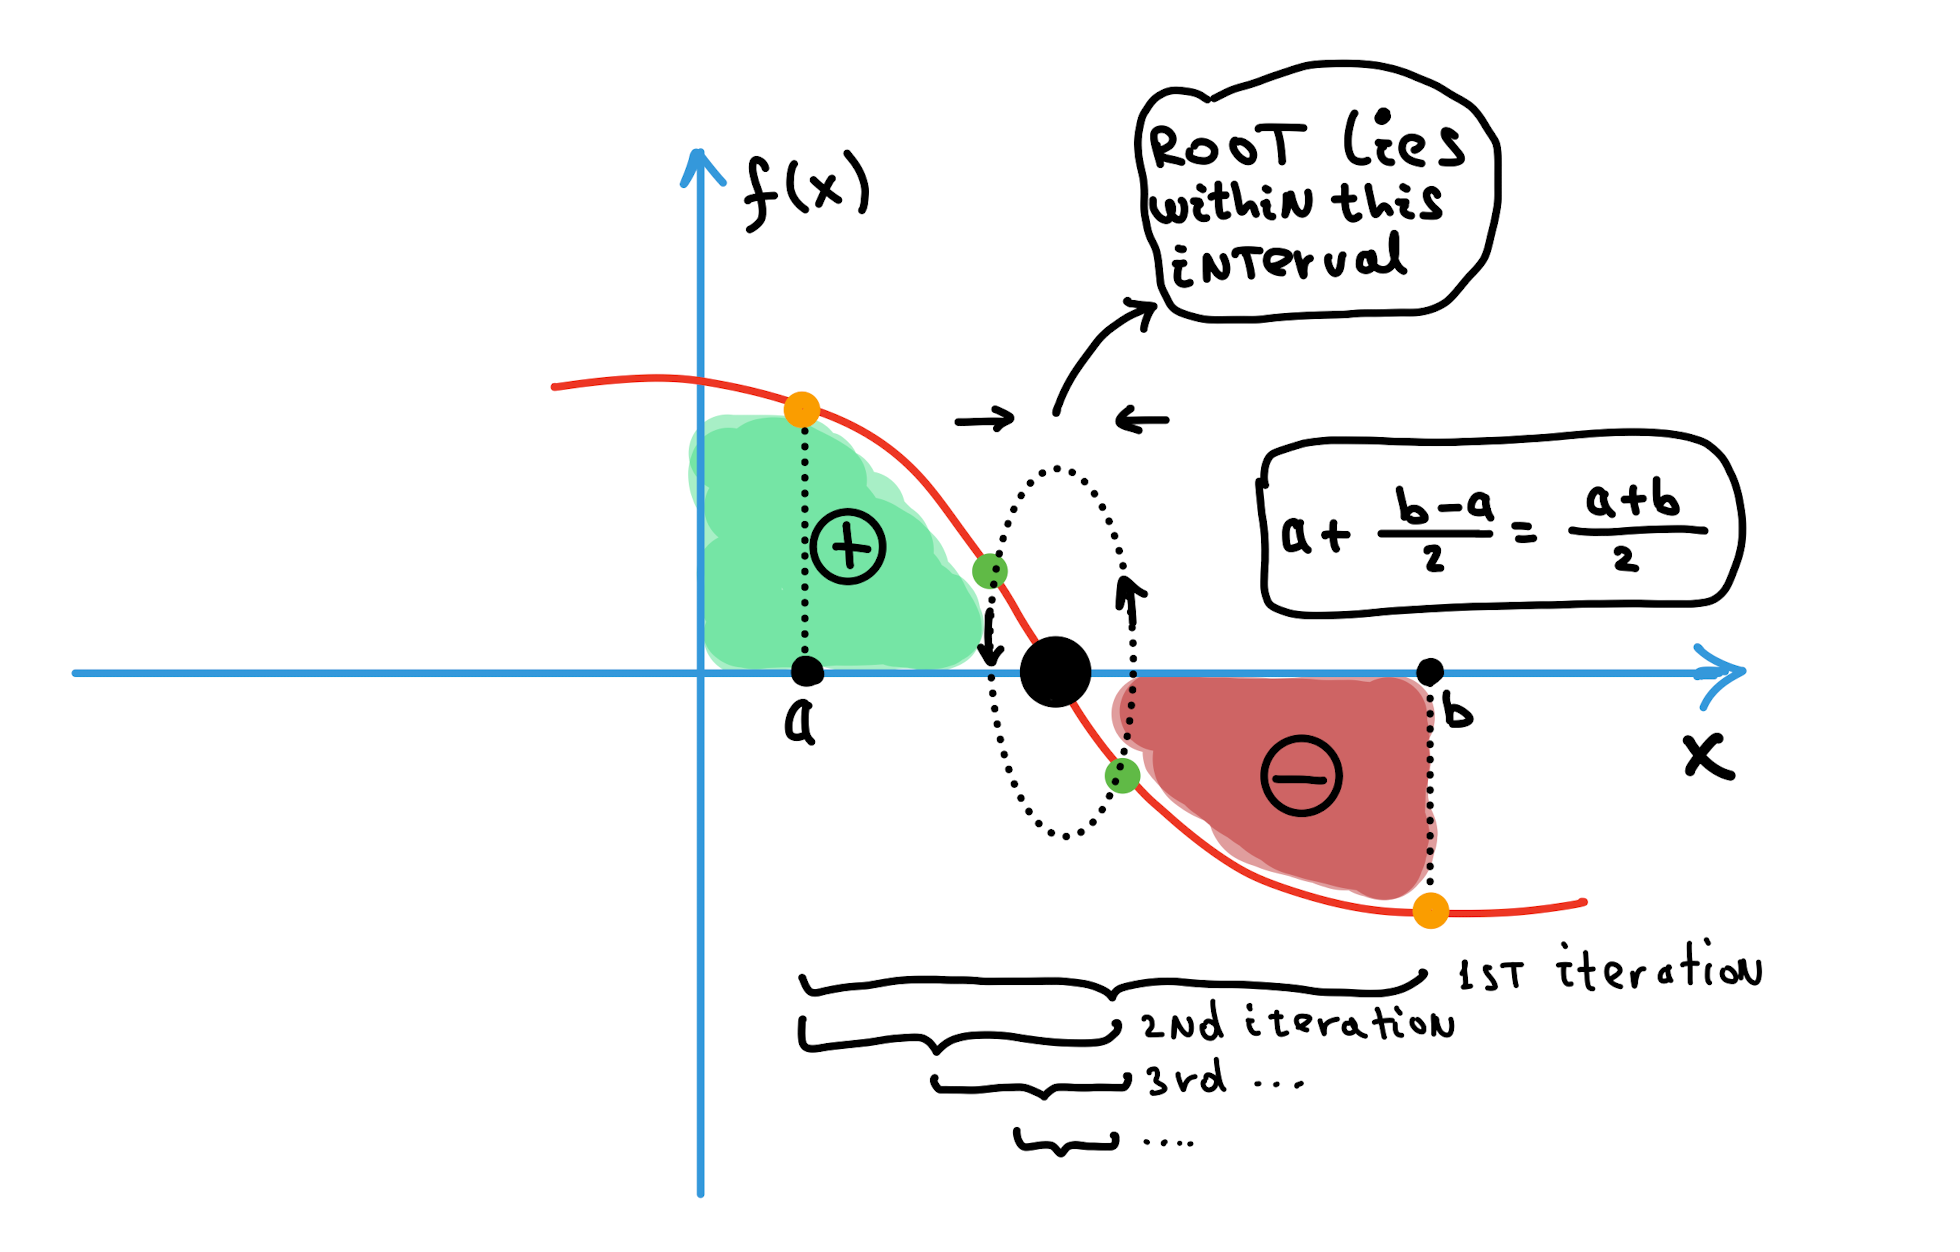

- Suppose we need to compute the roots of *f*(*x*)=*x*<sup>3</sup> − 2*x*<sup>2</sup>. This function has a (double) root at *x* = 0 (this is trivial to see) and another root which is located between *x* = 1.5 (where *f*(1.5)= − 1.125) and *x* = 3 (where *f*(3)=9). It is pretty straightforward to see that this other root is located at *x* = 2. 

In [ ]:
import numpy as np
from matplotlib import pyplot as plt
x = np.arange(-2,3,0.01)
y = (x**3) - (2*x**2)
plt.plot(x,y)
plt.ylim([-2,5])
plt.xlabel("x")
plt.ylabel("$f(x)$")
plt.show()

The `bisect()` method takes three compulsory arguments: 

1. the function *f*(*x*), 
2. a lower limit *a* and
3. an upper limit *b*. 

An optional parameter `xtol` determines the maximum error of the method.

One of the requirements of the bisection method is that the interval \[*a*, *b*\] has to be chosen such that the function is either positive at *a* and negative at *b*, or that the function is negative at *a* and postive at *b*. In other words: *a* and *b* have to enclose a root.

In [ ]:
from scipy.optimize import bisect

def f(x):
    """returns f(x)=x^3-2x^2. Has roots at
    x=0 (double root) and x=2"""
    return x ** 3 - 2 * x ** 2

# main program starts here
x = bisect(f, 1.5, 3, xtol=1e-6)

print("The root x is approximately x=%14.12g,\n"
      "the error is less than 1e-6." % (x))
print("The exact error is %g." % (2 - x))

### 6.1.2 Root finding using the `fsolve` funcion

- An often better (in the sense of “more efficient”) algorithm than the bisection algorithm is implemented in the general purpose `fsolve()` function for root finding of (multidimensional) functions.

- This algorithm needs only one starting point close to the suspected location of the root (but is not garanteed to converge).


In [ ]:
from scipy.optimize import fsolve

def f(x):
    return x ** 3 - 2 * x ** 2

x = fsolve(f, 3)           # one root is at x=2.0

print("The root x is approximately x=%21.19g" % x)
print("The exact error is %g." % (2 - x))

## 6.1.3 Root finding using the Newton-Raphson Method

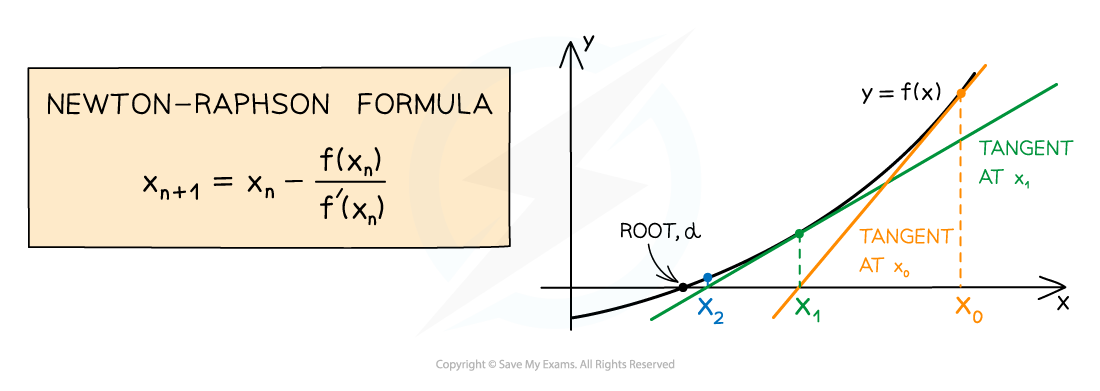

In [ ]:
import numpy as np
def Newton_Raphson(f, df, x0, tol):
    if abs(f(x0)) < tol:
        return x0
    else:
        return Newton_Raphson(f, df, x0 - f(x0)/df(x0), tol)


f = lambda x: x**2 - 2
f_prime = lambda x: 2*x

estimate = Newton_Raphson(f, f_prime, 1.5, 1e-6)
print("estimate =", estimate)
print("sqrt(2) =", np.sqrt(2))
    

## 6.2 Optimisation
- Often we need to find the maximum or minimum of a particular function *f*(*x*) where *f* is a scalar function but *x* could be a vector. 
- Typical applications are the minimisation of entities such as cost, risk and error, or the maximisation of productivity, efficiency and profit. 
- Optimisation routines typically provide a method to minimise a given function: if we need to maximise *f*(*x*) we create a new function *g*(*x*) that reverses the sign of *f*, i.e. *g*(*x*)= − *f*(*x*) and we minimise *g*(*x*).
- Typically, the search for the minimum is a local search.

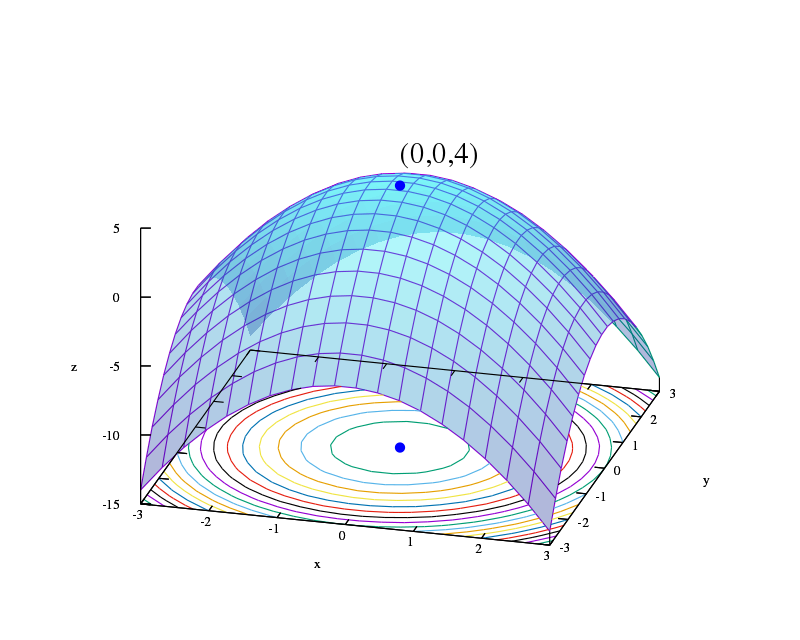

In [ ]:
from numpy import arange, cos, exp
from scipy.optimize import fmin
import pylab

def f(x):
    return cos(x) - 3 * exp( -(x - 0.2) ** 2)

# find minima of f(x),
# starting from 1.0 and 2.0 respectively
minimum1 = fmin(f, 1.0)
print("Start search at x=1., minimum is", minimum1)
minimum2 = fmin(f, 2.0)
print("Start search at x=2., minimum is", minimum2)

# plot function
x = arange(-10, 10, 0.1)
y = f(x)
pylab.plot(x, y, label='$\cos(x)-3e^{-(x-0.2)^2}$')
pylab.xlabel('x')
pylab.grid()
pylab.axis([-5, 5, -2.2, 0.5])

# add minimum1 to plot
pylab.plot(minimum1, f(minimum1), 'vr',
           label='minimum 1')
# add start1 to plot
pylab.plot(1.0, f(1.0), 'or', label='start 1')

# add minimum2 to plot
pylab.plot(minimum2,f(minimum2),'vg',\
           label='minimum 2')
# add start2 to plot
pylab.plot(2.0,f(2.0),'og',label='start 2')

pylab.legend(loc='lower left')

## 6.3 Interpolation

- Given a set of *N* points $(x_i, y_i)$ with $i = 1, 2, …N$, we sometimes need a function $\hat{f}(x)$ which returns $y_i = f(x_i)$ where $x == x_i$, and which in addition provides some interpolation of the data $(x_i, y_i)$ for all $x$.

- The function `y0 = scipy.interpolate.interp1d(x,y,kind=’nearest’)` does this interpolation based on splines of varying order. 

- Note that the function `interp1d` returns *a function* `y0` which will then interpolate the x-y data for any given $x$ when called as $y0(x)$.


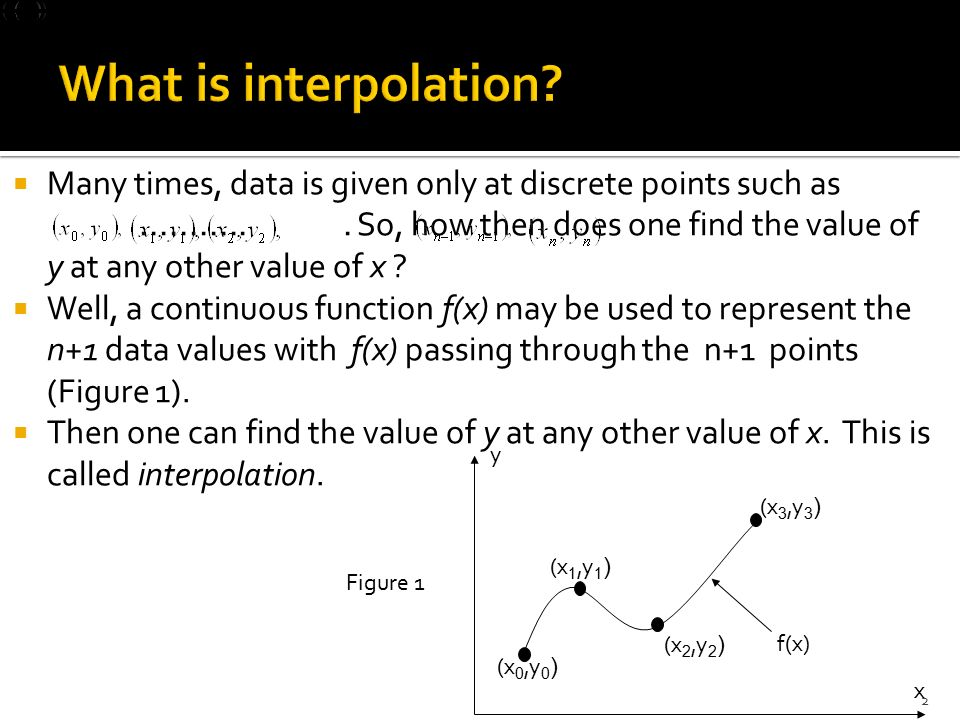

In [ ]:
import numpy as np
import scipy.interpolate
import pylab

def create_data(n):
    """Given an integer n, returns n data points
    x and values y as a numpy.array."""
    xmax = 5.
    x = np.linspace(0, xmax, n)
    y = - x**2
    #make x-data somewhat irregular
    y += 1.5 * np.random.normal(size=len(x))
    return x, y

#main program
n = 10
x, y = create_data(n)

#use finer and regular mesh for plot
xfine = np.linspace(0.1, 4.9, n * 100)
#interpolate with piecewise constant function (p=0)
y0 = scipy.interpolate.interp1d(x, y, kind='nearest')
#interpolate with piecewise linear func (p=1)
y1 = scipy.interpolate.interp1d(x, y, kind='linear')
#interpolate with piecewise constant func (p=2)
y2 = scipy.interpolate.interp1d(x, y, kind='quadratic')

pylab.plot(x, y, 'o', label='data point')
pylab.plot(xfine, y0(xfine), label='nearest')
pylab.plot(xfine, y1(xfine), label='linear')
pylab.plot(xfine, y2(xfine), label='cubic')
pylab.legend()
pylab.xlabel('x')

## 6.5 Curve Fitting
- Let’s assume we have x-y data to which we like to fit a curve (to minimise the least square deviation of the fit from the data).

- Numpy provides the routine <span>`polyfit(x,y,n)`</span> (which is similar to Matlab’s `polyfit` function which takes a list <span>`x`</span> of x-values for data points, a list <span>`y`</span> of y-values of the same data points and a desired order of the polynomial that will be determined to fit the data in the least-square sense as well as possible.

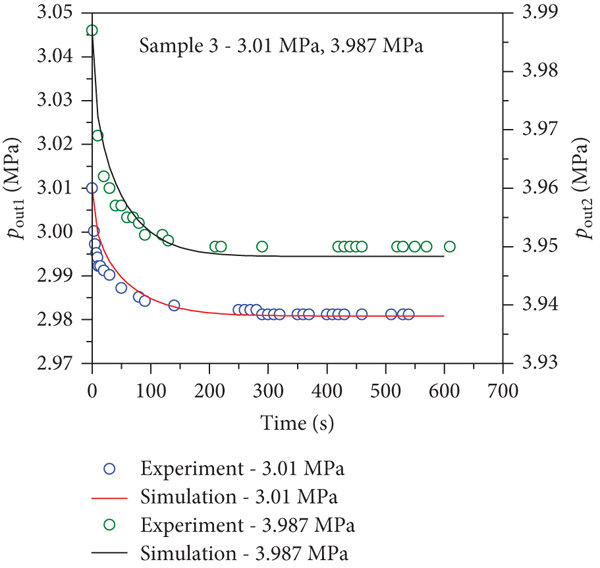

In [ ]:
%matplotlib inline
import numpy as np

# demo curve fitting : xdata and ydata are input data
xdata = np.array([0.0 , 1.0 , 2.0 , 3.0 , 4.0 , 5.0])
ydata = np.array([0.0 , 0.8 , 0.9 , 0.1 , -0.8 , -1.0])

# now do fit for cubic (order = 3) polynomial
z = np.polyfit(xdata, ydata, 3)

# z is an array of coefficients , highest first , i . e .
#                 X^3            X^2          X             0
# z = array ([ 0.08703704 , -0.81349206 , 1.69312169 , -0.03968254])
# It is convenient to use ‘poly1d‘ objects for dealing with polynomials:
p = np.poly1d(z) # creates a polynomial function p from coefficients
                 # and p can be evaluated for all x then .

# create plot
xs = [0.1 * i for i in range (50)]
ys = [p(x) for x in xs]   # evaluate p(x) for all x in list xs

import pylab
pylab.plot(xdata, ydata, 'o', label='data')
pylab.plot(xs, ys, label='fitted curve')
pylab.ylabel('y')
pylab.xlabel('x')

- Lets introduce a more generic curve fitting algorithm.

- Scipy provides a somewhat generic function (based on the Levenburg-Marquardt algorithm )through `scipy.optimize.curve_fit` to fit a given (Python) function to a given data set. The assumption is that we have been given a set of data with points $x_1, x_2, …x_N$ and with corresponding function values $y_i$ and a dependence of $y_i$ on $x_i$ such that $y_i=f(x_i,\vec{p})$. We want to determine the parameter vector $\vec{p}=(p_1, p_2, \ldots,p_k)$ so that $r$, the sum of the residuals, is as small as possible:

$$r = \sum\limits_{i=1}^N \left(y_i - f(x_i, \vec{p})\right)^2$$

- Curve fitting is of particular use if the data is noisy: for a given $x_i$ and $y_i=f(x_i,\vec{p})$ we have a (unknown) error term $\epsilon_i$ so that $y_i=f(x_i,\vec{p})+\epsilon_i$.


In [ ]:
import numpy as np
from scipy.optimize import curve_fit


def f(x, a, b, c):
    """Fit function y=f(x,p) with parameters p=(a,b,c). """
    return a * np.exp(- b * x) + c

#create fake data
x = np.linspace(0, 4, 50)
y = f(x, a=2.5, b=1.3, c=0.5)
#add noise
yi = y + 0.2 * np.random.normal(size=len(x))

#call curve fit function
popt, pcov = curve_fit(f, x, yi)
a, b, c = popt
print("Optimal parameters are a=%g, b=%g, and c=%g" % (a, b, c))

#plotting
import pylab
yfitted = f(x, *popt)   # equivalent to f(x, popt[0], popt[1], popt[2])
pylab.plot(x, yi, 'o', label='data $y_i$')
pylab.plot(x, yfitted, '-', label='fit $f(x_i)$')
pylab.xlabel('x')
pylab.legend()

## 6.6 Numerical Differentiation
- The numerical derivative approximates the “true derivative” by using a tiny value h.
- As a result, the value is subject to error. 
- There is a technique called “central difference approximation” to reduce the approximation error. 

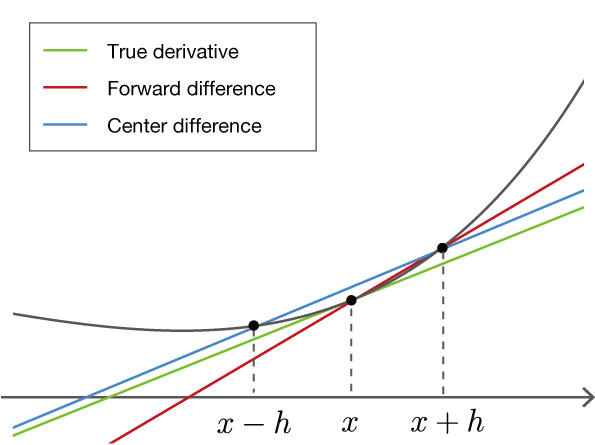

In [ ]:
def derivative(f,a,method='central',h=0.001):
    if method == 'central':
        return (f(a + h) - f(a - h))/(2*h)
    elif method == 'forward':
        return (f(a + h) - f(a))/h
    elif method == 'backward':
        return (f(a) - f(a - h))/h
    else:
        raise ValueError("Method must be 'central', 'forward' or 'backward'.")

derivative(np.cos,0)

x = np.linspace(0,5*np.pi,100)
dydx = derivative(np.sin,x)

dYdx = np.cos(x)

plt.figure(figsize=(12,5))
plt.plot(x,dydx,'r.',label='Central Difference')
plt.plot(x,dYdx,'b',label='True Value')

plt.title('Central Difference Derivative of y = cos(x)')
plt.legend(loc='best')
plt.show()


## 6.7 Numerical Integration
Scientific Python provides a number of integration routines. A general purpose tool to solve integrals *I* of the kind

$$I=\int_a^b f(x) \mathrm{d} x$$

is provided by the `quad()` function of the `scipy.integrate` module.

- It takes as input arguments the function *f*(*x*) to be integrated (the “integrand”), and the lower and upper limits *a* and *b*. 
- It returns two values (in a tuple): the first one is the computed results and the second one is an estimation of the numerical error of that result.

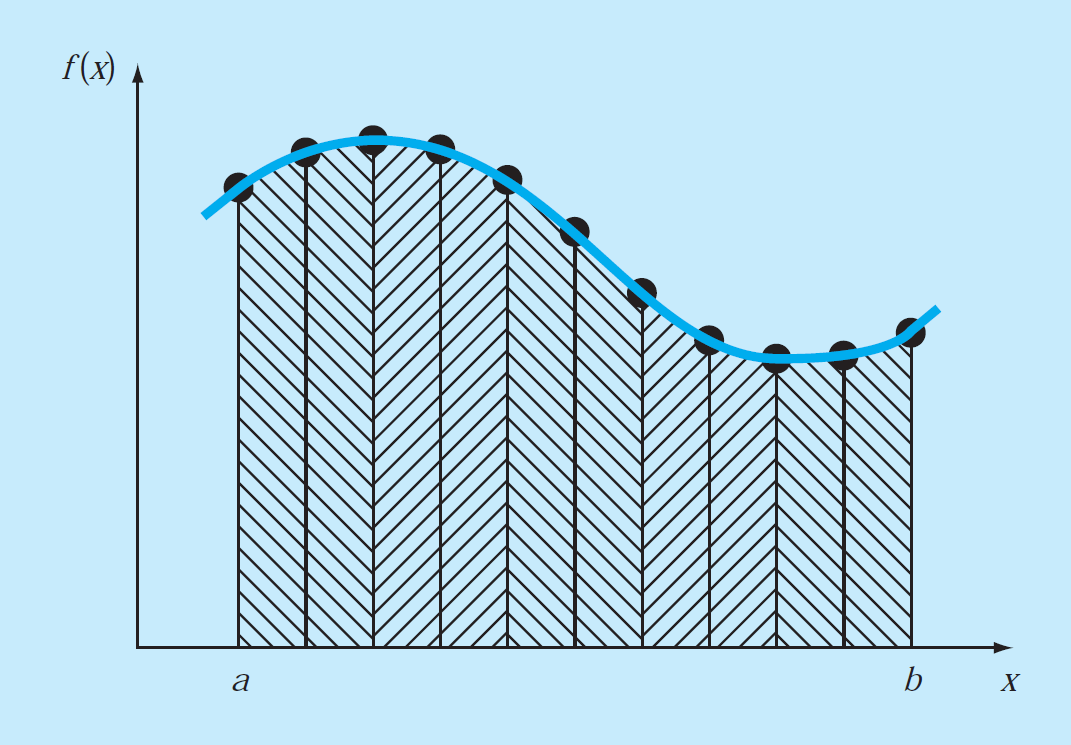

In [ ]:
from math import cos, exp, pi
from scipy.integrate import quad

# function we want to integrate
def f(x):
    return exp(cos(-2 * x * pi)) + 3.2

# call quad to integrate f from -2 to 2
res, err = quad(f, -2, 2)

print("The numerical result is {:f} (+-{:g})"
    .format(res, err))

### Exercise 
1.  Using scipy’s `quad` function, write a program that solves the following integral numerically: $I = \int
_0^1\cos(2\pi x) dx$.

2.  Find the analytical integral and compare it with the numerical solution.

3.  Why is it important to have an estimate of the accuracy (or the error) of the numerical integral?

### Exercise
It is good practice to plot the integrand function to check whether it is “well behaved” before you attempt to integrate. Singularities (i.e. $x$ values where the $f(x)$ tends towards minus or plus infinity) or other irregular behaviour (such as $f(x)=\sin(\frac{1}{x}$) close to $x = 0$ are difficult to handle numerically.

1.  Write a function with name `plotquad` which takes the same arguments as the quad command (*i.e.* $f$, $a$ and $b$) and which 
- (i) creates a plot of the integrand $f(x)$ and 
- (ii) computes the integral numerically using the `quad` function. The return values should be as for the `quad` function.

## 6.8 Solving Ordinary Differential Equations (ODEs)

To solve an ordinary differential equation of the type
$$\frac{\mathrm{d}y}{\mathrm{d}t}(t) = f(t, y)$$

with a given $y(t_0)=y_0$, we can use `scipy`’s `solve_ivp` function. Here is a (self explaining) example program (`usesolve_ivp.py`) to find 

$$y(t) \quad \mathrm{for}\quad t\in[0,2]$$
 given this differential equation:
$$\frac{\mathrm{d}y}{\mathrm{d}t}(t) = -2yt \quad \mathrm{with} \quad y(0)=1.$$

In [ ]:
from scipy.integrate import solve_ivp
import numpy as np

def f(t, y):
    """this is the rhs of the ODE to integrate, i.e. dy/dt=f(y,t)"""
    return -2 * y * t

y0 = [1]           # initial value y0=y(t0)
t0 = 0             # integration limits for t: start at t0=0
tf = 2             # and finish at tf=2

sol = solve_ivp(fun=f, t_span=[t0, tf], y0=y0)  # computation of SOLution 

import pylab          # plotting of results
pylab.plot(sol.t, sol.y[0], 'o-')
pylab.xlabel('t'); pylab.ylabel('y(t)')

We have not given the `solve_ivp` command any guidance for which values of $t$ we would like to know the solution $y(t)$: we have only specified that $t_0 = 0$ and that we would like to know the solution between $t_0=0$ and $t_y=2$. The solver itself has determined the number of required function evaluations, and returns the corresponding values in `sol.t` and `sol.y[0]`.

We can obtain more data points in a number of ways:

1. Increase the default error tolerance. The relative tolerance (`rtol`) and absolute tolerance (`atol`) default to `1e-3` each. If we increase them, we typically enforce the use of a larger number of intermediate points:

In [ ]:
sol = solve_ivp(fun=f, t_span=[t0, tf], y0=y0, atol=1e-8, rtol=1e-8)

pylab.plot(sol.t, sol.y[0], '.')
pylab.xlabel('t'); pylab.ylabel('y(t)')

In [ ]:
# We can also prescribe the precise locations for which we like to know the solutions  𝑦(𝑡)
y0 = [1]           # initial value
t0 = 0             # integration limits for t
tf = 2              
ts = np.linspace(t0, tf, 100)  # 100 points between t0 and tf

sol = solve_ivp(fun=f, t_span=[t0, tf], y0=y0, t_eval=ts) 

pylab.plot(sol.t, sol.y[0], '.')
pylab.xlabel('t'); pylab.ylabel('y(t)')

If we use `t_eval` - and thus request values of the solution at particular points - `solve_ivp` will not generally change the way it computes the solution, but rather use interpolation to map the way it has internally computed the solution to the values of t for which we would like to know the solution. There is thus no (significant) computational penalty if we use `t_eval` to get smoother looking plots.

## 6.9 Systems of coupled ODEs

We want to show one example of two first-order ODEs that are coupled. This helps to understand why the initial value `y0` in the above example had to be provided in a list (`[y0]`) and why the solution is `sol.y[0]` rather than just `sol.y`.

We use the [Predator and prey example](http://www.scholarpedia.org/article/Predator-prey_model). Let
- $p_1(t)$ be the number of rabbits and
- $p_2(t)$ be the number of foxes at a given time $t$

To compute the time dependence of $p_1$ and $p_2$:
- Assume that rabbits proliferate at a rate $a$. Per unit time a number $a p_1$ of rabbits are born.
- Assume that the number of rabbits is reduced by collisions with foxes: per unit time $c p_1 p_2$ rabbits are eaten.
- Assume that birth rate of foxes depends only on food intake in form of rabbits.
- Assume that foxes die a natural death at a rate $b$.
  
We put this together into the system of coupled ordinary differential equations:
  \begin{eqnarray}
    \label{eq:predprey}
    \frac{d p_1}{dt} &=& a p_1 - c p_1 p_2\nonumber\\
    \frac{d p_1}{dt} &=& c p_1 p_2 - b p_2\nonumber
  \end{eqnarray}

We use the following parameters:

- rabbit birth rate $a = 0.7$
- rabbit-fox-collision rate $ c = 0.007$
- fox death rate $b = 1$

We want to solve this for $p_1(t_0)=70$ and $p_2(t_0)=50$ as initial values, starting at $t_0=0$ for 30 units of time.

In [ ]:
import pylab
import numpy as np
from scipy.integrate import solve_ivp


def rhs(t, y):
    a = 0.7
    c = 0.007
    b = 1
    p1 = y[0]
    p2 = y[1]

    dp1dt = a * p1 - c * p1 * p2
    dp2dt = c * p1 * p2 - b * p2

    return [dp1dt, dp2dt]


p0 = [70, 50]      # initial condition
t0 = 0
tfinal = 30
ts = np.linspace(t0, tfinal, 200)

sol = solve_ivp(rhs, [t0, tfinal], p0, t_eval=ts)

p1 = sol.y[0]                
p2 = sol.y[1]                

pylab.plot(sol.t, p1, label='rabbits')
pylab.plot(sol.t, p2, '-og', label='foxes')
pylab.legend()
pylab.xlabel('t')
pylab.savefig('predprey.pdf')
pylab.savefig('predprey.png')